In [1]:
%reset -f

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
pd.set_option('display.max_rows', None)
df1=pd.read_csv('longitudinal_dispersion.csv')
display(df1)

,w_m,h_m,u_ms,us_ms,K_m2s
0,1.4000,0.19000,0.38000,0.110000,9.600000
1,1.5000,0.14000,0.33000,0.100000,1.900000
2,3.5700,0.20000,0.15000,0.100000,1.900000
3,3.7700,0.27000,0.23000,0.120000,2.350000
4,5.0000,0.28000,0.26000,0.210000,7.200000
5,5.1000,0.25000,0.14000,0.090000,2.530000
6,5.5400,0.30000,0.15000,0.090000,3.020000
7,5.5700,0.31000,0.26000,0.090000,2.440000
8,7.6000,3.45000,0.68000,0.047000,0.500000
9,9.0000,0.30000,0.37000,0.150000,8.400000


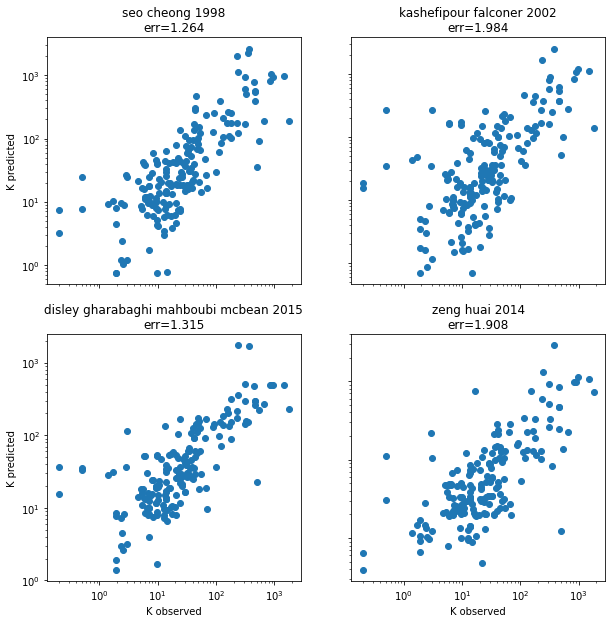

In [25]:
N=185
w=df1[['w_m']].to_numpy().ravel()
h=df1[['h_m']].to_numpy().ravel()
u=df1[['u_ms']].to_numpy().ravel()
us=df1[['us_ms']].to_numpy().ravel()
k=df1[['K_m2s']].to_numpy().ravel()

k1=h*us*0.64*(w/h)**1.23*(u/us)**1.25  #seo cheong 1998
k2=h*u*(7.428+1.775*(w/h)**0.62*(us/u)**0.572)*(u/us) #kashefipour falconer 2002
k3=h*us*3.563*(u/np.sqrt(9.81*h))**-0.4117*(w/h)**0.6776*(u/us)**1.0132 #disley gharabaghi mahboubi mcbean 2015
k4=h*u*5.4*(w/h)**0.7*(u/us)**0.13 #zeng huai 2014
k5=5.93*us*h   #elder 1959
k5=0.58*u*w*(h/us)**2   #mcquivey and keefer 1974
k5=0.011*u**2*w**2/h/us   #fischer et al. 1979
k5=0.55*w*us/h**2 #li et al 1998
k5=0.18*(h/us)**0.5*(w/h)**2*h*us   #liu 1977
k5=2.0*(w/h)**1.5*h*u   #iwasa and aya 1991
k5=5.92*(u/us)**1.43*(w/h)**0.63*h*us  #seo and bake 2004
k5=0.6*(w/h)**2*h*us  #koussis and rodriguez mirasol 1998
k5=0.2*(u/us)**1.2*(w/h)**1.3*h*us   #li et al 1998
epst=0.145+1/3520*(u/us)*(w/h)**1.30
k5=0.15/(8*epst)*(u/us)**2*(w/h)**1.67*h*us
k5=10.612*(u/us)*u*h   #sahay and dutta 2009
k5=7.428+1.775*(u/us)**1.572*(w/h)**0.62*h*u   #tavakollizadeh and kashefipur 2007
k5=2*(w/h)**0.96*(u/us)**1.26*h*us    #sahay and dutta 2009b
k5=5.4*(u/us)**0.13*(w/h)**0.7 #zeng and huai 2014

k5_1=h*us*(1.6896*w/h+20.0124*u/us+393.3346)
k5_2=h*us*(2.8759*w/h+181.7915*u/us+339.5557)
k5=k5_1
cond1=w/h>47.238
k5[cond1]=k5_2[cond1]  #katayoun kargar



def f_err(k,khat):
    return np.dot(np.log(khat/k),np.log(khat/k))/N

err1=np.round(f_err(k,k1),3)
err2=np.round(f_err(k,k2),3)
err3=np.round(f_err(k,k3),3)
err4=np.round(f_err(k,k4),3)
err5=np.round(f_err(k,k5),3)

fig, axs = plt.subplots(2, 2)
axs[0, 0].scatter(k,k1)
axs[0, 0].set_title('seo cheong 1998\nerr='+str(err1))
axs[0, 1].scatter(k,k2)
axs[0, 1].set_title('kashefipour falconer 2002\nerr='+str(err2))
axs[1, 0].scatter(k,k3)
axs[1, 0].set_title('disley gharabaghi mahboubi mcbean 2015\nerr='+str(err3))
axs[1, 1].scatter(k,k5)
axs[1, 1].set_title('zeng huai 2014\nerr='+str(err5))

for ax in axs.flat:
    ax.set(xlabel='K observed', ylabel='K predicted')
    ax.set_xscale('log')
    ax.set_yscale('log')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
    
fig.set_size_inches(10, 10)



[ 0.66027333  1.75014241  0.         -0.70267438  0.          7.30254958
  0.64059179  0.          0.02876655  0.        ]
0.765


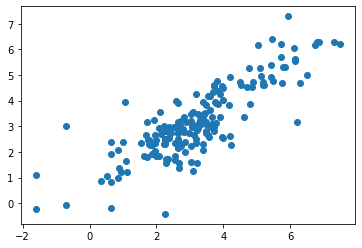

In [26]:
def f(w,h,u,us,a):
    temp1=h*u*a[0]*(w/h)**a[1]*(u/us)**a[3]
    temp2=h*u*a[5]*(w/h)**a[6]*(u/us)**a[8]
    k1=h*us*0.64*(w/h)**1.23*(u/us)**1.25
    cond1=w/h<38
    temp=temp2
    temp[cond1]=temp1[cond1]

    return temp

a = [0.64, 1.23,0, 1.25,0, 0.64, 1.23,0, 1.25,0]
ff = lambda a : np.dot(np.log(f(w,h,u,us,a)/k),np.log(f(w,h,u,us,a)/k))/N

res = minimize(ff, a)
a=res.x
print(a)
kk=f(w,h,u,us,a)

err_kk=np.round(np.dot(np.log(f(w,h,u,us,a)/k),np.log(f(w,h,u,us,a)/k))/N,3)
print(err_kk)

plt.scatter(np.log(k),np.log(kk))


[ 0.2150125  -0.20730788 -3.14549953  0.86468979 12.63474388 -0.37722286
 -0.14799077  0.37165219 -0.45775287 -0.3706679   0.01817281 -0.27898685
  0.13281935]
0.008638971098583416


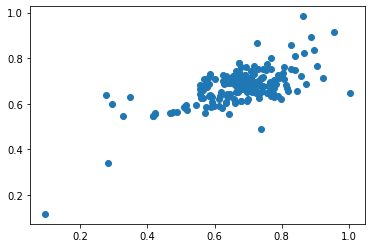

In [239]:
x1=np.log(u/us)/6+0.35
x2=np.log(w/h)/7
y=np.log(k/(h*u))/10+0.25


def f(x1,x2,a):
    #return a[0]+a[1]*x1+a[2]*x2  #0.0092
    #return a[0]+a[1]*np.tanh(a[2]+a[3]*x1+a[4]*x2)+a[5]*np.tanh(a[6]+a[7]*x1+a[8]*x2) #0.0079
    #return a[0]+a[1]*x1+a[2]*x2+a[4]*x1**2+a[5]*x2**2+a[6]*x1*x2   #0.00802
    #return a[0]+a[1]*x1**(a[2]+a[3]*x1+a[4]*x2)+a[5]*x2**(a[6]+a[7]*x1+a[8]*x2)  #0.0076
    #return a[0]+a[1]*np.tanh(a[2]+a[3]*x1+a[4]*x2)+a[5]*np.tanh(a[6]+a[7]*x1+a[8]*x2)+a[9]*np.tanh(a[10]+a[11]*x1+a[12]*x2) #0.00706
    return a[0]+a[1]*x1+a[2]*x2+a[3]*np.minimum(x1,0.3)+a[4]*np.minimum(x2,0.3)*x2

a = np.random.rand(13)-0.5
ff = lambda a : np.dot(f(x1,x2,a)-y,f(x1,x2,a)-y)/N
#ff = lambda a : np.sum(np.abs(f(x1,x2,a)))/N

res = minimize(ff, a)
a=res.x
print(a)
yy=f(x1,x2,a)

err_kk=np.dot(f(x1,x2,a)-y,f(x1,x2,a)-y)/N
print(err_kk)

plt.scatter(y,yy)
